# **Análisis de datos asociados a mutaciones en cáncer.**

**1. Cargar el DataFrame**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Doctorado_Bioinformatica/programacion_bioinformatica')


Mounted at /content/drive


In [ ]:
pwd()

'/content/drive/MyDrive/Doctorado_Bioinformatica'

In [3]:
import pandas as pd

df_cancer = pd.read_csv("/content/drive/MyDrive/Doctorado_Bioinformatica/programacion_bioinformatica/frequently_mutated_genes_2024-10-28-1.csv", sep=';')
print(df_cancer)

            gene_id   symbol  \
0   ENSG00000141510     TP53   
1   ENSG00000181143    MUC16   
2   ENSG00000164796    CSMD3   
3   ENSG00000168702    LRP1B   
4   ENSG00000133703     KRAS   
5   ENSG00000121879   PIK3CA   
6   ENSG00000196159     FAT4   
7   ENSG00000165323     FAT3   
8   ENSG00000167548    KMT2D   
9   ENSG00000171862     PTEN   
10  ENSG00000117713   ARID1A   
11  ENSG00000134982      APC   
12  ENSG00000083857     FAT1   
13  ENSG00000055609    KMT2C   
14  ENSG00000157764     BRAF   
15  ENSG00000147724  FAM135B   
16  ENSG00000196712      NF1   
17  ENSG00000213281     NRAS   
18  ENSG00000140836    ZFHX3   
19  ENSG00000174469  CNTNAP2   
20  ENSG00000085224     ATRX   
21  ENSG00000148400   NOTCH1   
22  ENSG00000196090    PTPRT   
23  ENSG00000005339   CREBBP   
24  ENSG00000183454   GRIN2A   
25  ENSG00000153707    PTPRD   
26  ENSG00000149311      ATM   
27  ENSG00000115760    BIRC6   
28  ENSG00000173821   RNF213   
29  ENSG00000196367    TRRAP   
30  ENSG

**2. Exploración Inicial de los Datos**
  
    Información general

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   gene_id                        49 non-null     object
 1   symbol                         49 non-null     object
 2   name                           49 non-null     object
 3   type                           49 non-null     object
 4   num_cohort_ssm_affected_cases  49 non-null     int64 
 5   num_cohort_ssm_cases           49 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ KB


In [ ]:
df_cancer.head()

,gene_id,symbol,name,type,num_cohort_ssm_affected_cases,num_cohort_ssm_cases
0,ENSG00000141510,TP53,tumor protein p53,protein_coding,4964,16508
1,ENSG00000181143,MUC16,"mucin 16, cell surface associated",protein_coding,2903,16508
2,ENSG00000164796,CSMD3,CUB and Sushi multiple domains 3,protein_coding,1991,16508
3,ENSG00000168702,LRP1B,LDL receptor related protein 1B,protein_coding,1784,16508
4,ENSG00000133703,KRAS,"KRAS proto-oncogene, GTPase",protein_coding,1763,16508


    Estadísticas descriptivas

In [ ]:
df_cancer.describe()

,num_cohort_ssm_affected_cases,num_cohort_ssm_cases
count,49.000000,49.0
mean,1036.163265,16508.0
std,724.812198,0.0
min,611.000000,16508.0
25%,677.000000,16508.0
50%,776.000000,16508.0
75%,1069.000000,16508.0
max,4964.000000,16508.0


    Valores únicos

**3. Análisis de Mutaciones**

    Genes más mutados:
      Podemos calcular la frecuencia de mutaciones para cada gen y ordenar los resultados para encontrar los genes más afectados.

In [ ]:
## Calculate the frequency of mutations for gen
df_cancer ["mutation_frequency"] = df_cancer ["num_cohort_ssm_affected_cases"] / df_cancer["num_cohort_ssm_cases"]

# Order from highest to lowest
df_cancer_sort = df_cancer.sort_values(by="mutation_frequency", ascending=False)

# Show the genes most affects
print(df_cancer_sort[["symbol", "mutation_frequency"]].head(10))

#print(df_cancer_sort)


   symbol  mutation_frequency
0    TP53            0.300703
1   MUC16            0.175854
2   CSMD3            0.120608
3   LRP1B            0.108069
4    KRAS            0.106797
5  PIK3CA            0.102072
6    FAT4            0.087473
7    FAT3            0.087109
8   KMT2D            0.080930
9    PTEN            0.076811


    Tipos de genes más afectados:
      Podemos agrupar los datos por tipo de gen y calcular el número promedio de casos afectados.

In [ ]:
print(df_cancer["name"])

0                                     tumor protein p53
1                     mucin 16, cell surface associated
2                      CUB and Sushi multiple domains 3
3                       LDL receptor related protein 1B
4                           KRAS proto-oncogene, GTPase
5     phosphatidylinositol-4,5-bisphosphate 3-kinase...
6                               FAT atypical cadherin 4
7                               FAT atypical cadherin 3
8                           lysine methyltransferase 2D
9                        phosphatase and tensin homolog
10                        AT-rich interaction domain 1A
11               APC regulator of WNT signaling pathway
12                              FAT atypical cadherin 1
13                          lysine methyltransferase 2C
14        B-Raf proto-oncogene, serine/threonine kinase
15         family with sequence similarity 135 member B
16                                      neurofibromin 1
17                          NRAS proto-oncogene,

In [ ]:
#df_cancer
import re

for name in df_cancer['name']:
  match = re.search("receptor", name)
  if match:
    print (name)

    #print(f"Patrón encontrado en la posición: {match.start()}")

#print (name)

In [10]:
import re
import pandas as pd

# Diccionario de patrones
grupos = {
    "Receptor": "receptor",
    "Proto-oncogenes": "proto-oncogene",
    "Kinases": "kinase",
    "Transferases": "transferase",
    "Cadherins": "cadherin",
    "Phosphatases": "phosphatase"
}

# Creamos una lista para guardar grupo y gene
registros = []

#print (df_cancer['name'])
# enumerate takes an iterable (list or df) and returns pairs, index and value
for idx, name in enumerate(df_cancer['name']):
    for grupo, patron in grupos.items():
## re.IGNORE it tells the regular expression engine to ignore case when matching text
        if re.search(patron, name, re.IGNORECASE):
            registros.append({'gene': name, 'group': grupo})
## create dataframe
df_groups = pd.DataFrame(registros)

## Calculate frequency of genes by group
## value counts, counts how many times each unique value appears in the "group" column
## reset_intex, converts that series into a new dataframe
df_frecuencia = df_groups['group'].value_counts().reset_index()
df_frecuencia.columns = ['group', 'frequency']

# Ver los resultados
print(df_frecuencia)

             group  frequency
0         Receptor         11
1          Kinases          6
2  Proto-oncogenes          4
3        Cadherins          4
4     Transferases          4
5     Phosphatases          4


**Visualización de datos**

      Crear gráficos de barras para visualizar los genes más mutados o los tipos de genes más afectados.

<ipython-input-15-540f1923c97c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frecuencia, x='group', y='frequency', palette='Set2')


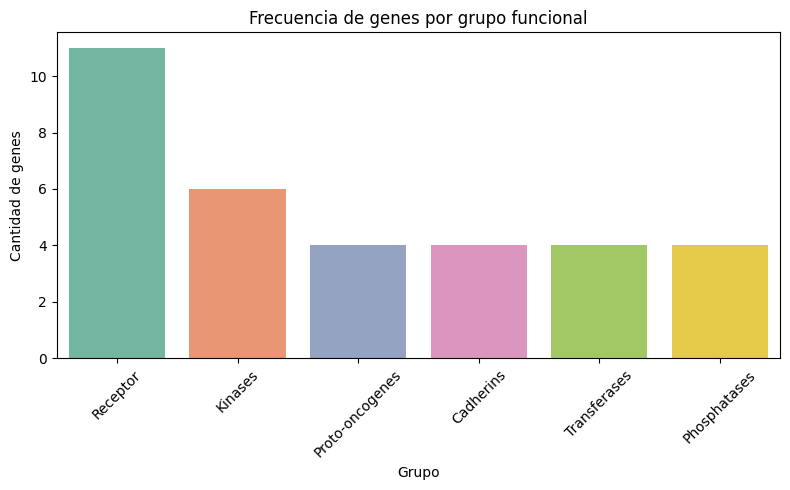

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df_frecuencia, x='group', y='frequency', palette='Set2')
plt.title('Frecuencia de genes por grupo funcional')
plt.ylabel('Cantidad de genes')
plt.xlabel('Grupo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Filtrado de datos**

    Filtre los datos para encontrar genes con una alta frecuencia (>0.3) de mutación en un tipo de gen específico.

In [23]:
total_genes = (len(df_cancer))
# Add a new column with relative frequency
df_frecuencia['proportion'] = df_frecuencia['frequency'] / total_genes

# Filter for genes with the proportion greater that 0.15
# [put the conditions]
df_filtered = df_frecuencia[df_frecuencia['proportion'] > 0.08]

print (df_filtered)


             group  frequency  proportion
0         Receptor         11    0.224490
1          Kinases          6    0.122449
2  Proto-oncogenes          4    0.081633
3        Cadherins          4    0.081633
4     Transferases          4    0.081633
5     Phosphatases          4    0.081633
